# Cross Validation With Multiple Algorithms


We will use credit card default data from https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: Download Data

In [2]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/credit-card-default/default.csv'
data_location = os.path.basename(data_url)

if not os.path.exists (data_location):
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: default.csv


In [3]:
data = pd.read_csv(data_location)
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
1262,1263,50000,1,2,1,44,0,0,0,0,...,26275,26823,27371,1524,1427,941,972,992,1000,0
22189,22190,200000,2,3,1,29,0,0,0,0,...,195609,131981,131294,7464,7889,6600,4602,4900,4726,0
9805,9806,180000,2,2,1,35,0,0,0,0,...,6759,6918,9777,1500,2000,1000,3000,4000,2000,0
9432,9433,400000,2,1,1,32,-2,-2,-2,-2,...,0,644,636,587,2651,0,644,636,572,0
25737,25738,60000,2,2,1,29,-1,-1,-1,-1,...,3742,3352,3570,2081,26,4822,3352,3570,1799,0
15896,15897,20000,2,2,2,25,0,0,0,0,...,10485,10700,10922,1144,1189,1053,268,277,358,1
18418,18419,160000,2,2,2,24,0,0,0,0,...,26514,17602,9308,3010,3000,2000,1000,2000,0,0
6465,6466,330000,2,1,2,34,0,0,0,0,...,227974,185431,107493,15000,10008,10000,20000,25000,3500,0
5972,5973,80000,1,1,2,26,0,0,0,0,...,49640,49685,46684,3515,2627,1697,2000,1700,3000,1
3514,3515,290000,2,2,2,25,0,0,0,0,...,61578,59274,61314,2500,3000,3000,3000,3000,3000,0


## Step-2: EDA

In [4]:
## Check data skew
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [5]:
data['default'].value_counts(normalize=True)

0   0.78
1   0.22
Name: default, dtype: float64

## Step-3: Clean up 

TODO

## Step-4: Shape data

In [6]:
label_col = 'default'

feature_columns = data.columns
## TODO : drop 'ID' and 'default' columns
feature_columns = feature_columns.drop (['ID', 'default'])
#print (feature_columns)

In [7]:
X = data[feature_columns]
y = data[[label_col]]

print (X.shape)
print (y.shape)

(30000, 23)
(30000, 1)


## Step-5: Cross Validation

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from pprint import pprint

## Choose models, we want to compare
## TODO: Here are we are choosing 'default' models
## What if we choose the 'best of' for each model
## See 'hyper-1' notebook for how to get the best model :-) 

models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
#models.append(('NB', GaussianNB()))


results = []
names = []
## for classification tasks
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
## for regression tasks
#scoring_metrics = ['r2', 'rmse']
y2 = np.ravel(y)
for name, model in models:
    print ('\n========= ', name , ' =========')
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_validate(model, X, y2, cv=5, scoring=scoring_metrics, n_jobs=-1)
    pprint (cv_results)
    # cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring_metric)
    this_result = cv_results['test_accuracy']
    results.append(this_result)
    names.append(name)
    print("\n{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result), np.median(this_result), np.std(this_result), this_result))



=========  LR  =========
{'fit_time': array([0.40571356, 0.42471552, 0.45415235, 0.41261244, 0.43180943]),
 'score_time': array([0.00912404, 0.00955343, 0.00823212, 0.00928569, 0.00906277]),
 'test_accuracy': array([0.7785    , 0.77883333, 0.77883333, 0.77866667, 0.77883333]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.6136779 , 0.6323223 , 0.66269859, 0.65994818, 0.6512671 ])}

LR: accuracy : avg=0.78, median=0.78,  std=0.00,  cv_results=[0.7785     0.77883333 0.77883333 0.77866667 0.77883333]

=========  KNN  =========
{'fit_time': array([0.00712299, 0.00670266, 0.00606132, 0.00481582, 0.0047884 ]),
 'score_time': array([10.33922577, 10.52525163, 10.46210122, 10.51937461,  9.83476567]),
 'test_accuracy': array([0.7495    , 0.74966667, 0.752     , 0.76133333, 0.763     ]),
 'test_f1': array([0.23666836, 0.22816033, 0.26843658, 0.25726141, 0.24361702]),
 'test_precision

## Step-6: Vizualize Results

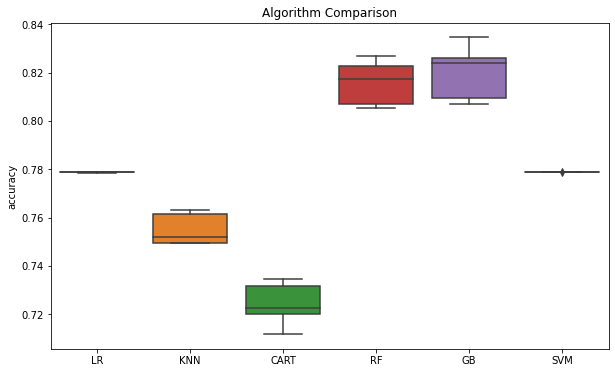

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results)
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()